# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from datetime import datetime
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#Set units for search
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nuuk
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | vadso
Processing Record 4 of Set 1 | iskateley
Processing Record 5 of Set 1 | kapa'a
Processing Record 6 of Set 1 | zeya
Processing Record 7 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 8 of Set 1 | kupjansk
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | kidal
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | buka
Processing Record 19 of Set 1 | san lorenzo
Processing Record 20 of Set 1 | santena
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | labrador city
Proc

Processing Record 39 of Set 4 | severo-yeniseyskiy
Processing Record 40 of Set 4 | callao
Processing Record 41 of Set 4 | tual
Processing Record 42 of Set 4 | mendoza
Processing Record 43 of Set 4 | sabha
Processing Record 44 of Set 4 | chandbali
Processing Record 45 of Set 4 | susuman
Processing Record 46 of Set 4 | banff
Processing Record 47 of Set 4 | aschau im chiemgau
Processing Record 48 of Set 4 | mossel bay
Processing Record 49 of Set 4 | sorong
Processing Record 0 of Set 5 | greymouth
Processing Record 1 of Set 5 | usinsk
Processing Record 2 of Set 5 | ad dilam
Processing Record 3 of Set 5 | latakia
Processing Record 4 of Set 5 | jamestown
Processing Record 5 of Set 5 | melekeok village
Processing Record 6 of Set 5 | novo aripuana
Processing Record 7 of Set 5 | arteche
Processing Record 8 of Set 5 | westport
Processing Record 9 of Set 5 | yeppoon
Processing Record 10 of Set 5 | raton
Processing Record 11 of Set 5 | port macquarie
Processing Record 12 of Set 5 | selkirk
Process

Processing Record 30 of Set 8 | happy valley-goose bay
Processing Record 31 of Set 8 | karystos
Processing Record 32 of Set 8 | le hocq
City not found. Skipping...
Processing Record 33 of Set 8 | lihue
Processing Record 34 of Set 8 | sinop
Processing Record 35 of Set 8 | kataragama
City not found. Skipping...
Processing Record 36 of Set 8 | forster
Processing Record 37 of Set 8 | suai
City not found. Skipping...
Processing Record 38 of Set 8 | orapa
Processing Record 39 of Set 8 | cascais
Processing Record 40 of Set 8 | lompoc
Processing Record 41 of Set 8 | whitby
Processing Record 42 of Set 8 | punta cana
Processing Record 43 of Set 8 | mamadysh
Processing Record 44 of Set 8 | kupino
Processing Record 45 of Set 8 | nalut
Processing Record 46 of Set 8 | sisimiut
Processing Record 47 of Set 8 | pangoa
Processing Record 48 of Set 8 | borba
Processing Record 49 of Set 8 | huntsville
Processing Record 0 of Set 9 | fernie
Processing Record 1 of Set 9 | menongue
Processing Record 2 of Set 9

Processing Record 16 of Set 12 | tharad
Processing Record 17 of Set 12 | kandla
Processing Record 18 of Set 12 | luau
Processing Record 19 of Set 12 | paidha
Processing Record 20 of Set 12 | stanthorpe
Processing Record 21 of Set 12 | pisco
Processing Record 22 of Set 12 | sola
Processing Record 23 of Set 12 | saskatoon
Processing Record 24 of Set 12 | san julian
Processing Record 25 of Set 12 | bikenibeu village
Processing Record 26 of Set 12 | tralee
Processing Record 27 of Set 12 | magdalena
Processing Record 28 of Set 12 | el calafate
Processing Record 29 of Set 12 | fisterra
Processing Record 30 of Set 12 | vorkuta
Processing Record 31 of Set 12 | 'ain deheb
Processing Record 32 of Set 12 | muynoq
Processing Record 33 of Set 12 | sao joao batista
Processing Record 34 of Set 12 | baoqing
Processing Record 35 of Set 12 | musay'id
City not found. Skipping...
Processing Record 36 of Set 12 | sibiti
Processing Record 37 of Set 12 | minot
Processing Record 38 of Set 12 | huocheng
City n

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nuuk,64.1835,-51.7216,-1.66,50,40,1.54,GL,1704155820
1,port-aux-francais,-49.3500,70.2167,4.76,96,100,16.52,TF,1704155993
2,vadso,70.0744,29.7487,-12.91,72,100,5.14,NO,1704155993
3,iskateley,67.6803,53.1512,-28.32,99,74,2.24,RU,1704155993
4,kapa'a,22.0752,-159.3190,27.99,76,20,7.72,US,1704155993


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("outputs/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("outputs/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nuuk,64.1835,-51.7216,-1.66,50,40,1.54,GL,1704155820
1,port-aux-francais,-49.3500,70.2167,4.76,96,100,16.52,TF,1704155993
2,vadso,70.0744,29.7487,-12.91,72,100,5.14,NO,1704155993
3,iskateley,67.6803,53.1512,-28.32,99,74,2.24,RU,1704155993
4,kapa'a,22.0752,-159.3190,27.99,76,20,7.72,US,1704155993


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

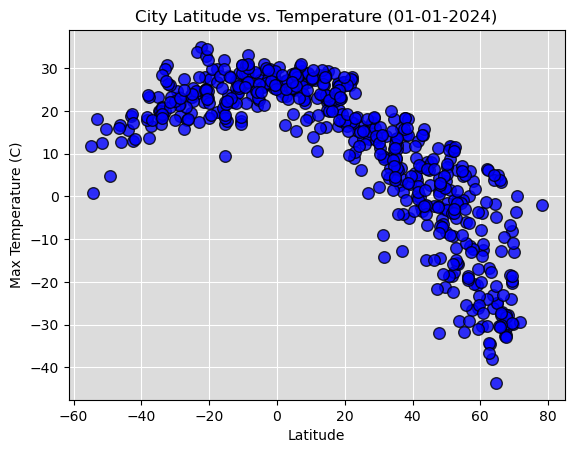

In [26]:
# Build scatter plot for latitude vs. temperature
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, color="blue", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 

# Save the figure
plt.savefig("outputs/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

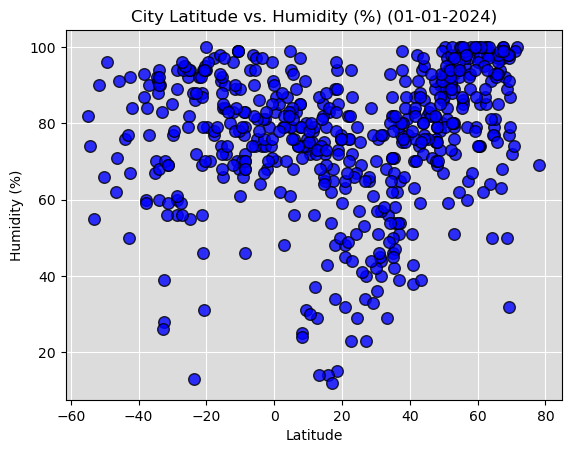

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, color="blue", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 

# Save the figure
plt.savefig("outputs/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

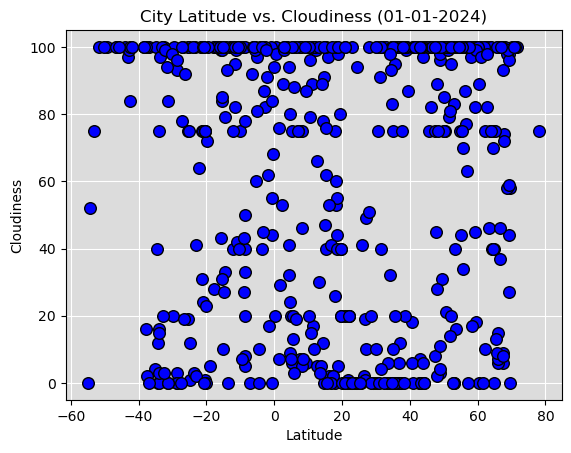

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="blue", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 

# Save the figure
plt.savefig("outputs/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

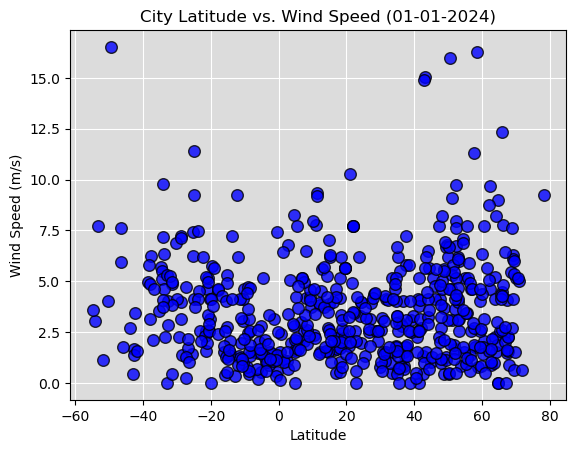

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, color="blue", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 


# Save the figure
plt.savefig("outputs/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots

def latitude_regress(df, x_Col, y_Col):
    
    # Perform the linear regression on the data
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], df[y_Col])
    
    # Set up x and y axes data points
    regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope * regr_line_x + regr_intercept

    # Create scatterplot
    df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col, color="blue", edgecolors="k", alpha=.8, s=[70], zorder=3)
    plt.grid(True, color='gainsboro', linestyle='solid', zorder=1) 

    # Add the best fit line
    df_axes.plot(regr_line_x, regr_line_y, 'r-', zorder=4)

    # Output linear regression info
    print(" ")
    print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
          .format(regr_slope, regr_intercept))
    print(" ")
    print("The r-squared correlation coefficient for this line is {:.2f}".format(regr_r_val))
                  
    # Return the axes object for the plots, in case any changes need to be made
    return df_axes

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nuuk,64.1835,-51.7216,-1.66,50,40,1.54,GL,1704155820
2,vadso,70.0744,29.7487,-12.91,72,100,5.14,NO,1704155993
3,iskateley,67.6803,53.1512,-28.32,99,74,2.24,RU,1704155993
4,kapa'a,22.0752,-159.3190,27.99,76,20,7.72,US,1704155993
5,zeya,53.7500,127.2667,-29.17,98,16,0.82,RU,1704155993


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.76,96,100,16.52,TF,1704155993
7,adamstown,-25.0660,-130.1015,23.29,82,100,4.15,PN,1704155994
14,edinburgh of the seven seas,-37.0676,-12.3116,16.57,90,100,2.13,SH,1704155995
17,san lorenzo,-25.3333,-57.5333,23.66,94,75,6.26,PY,1704155995
19,avarua,-21.2078,-159.7750,28.03,69,75,4.63,CK,1704155996


###  Temperature vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=-0.76x+33.55
 
The r-squared correlation coefficient for this line is -0.86


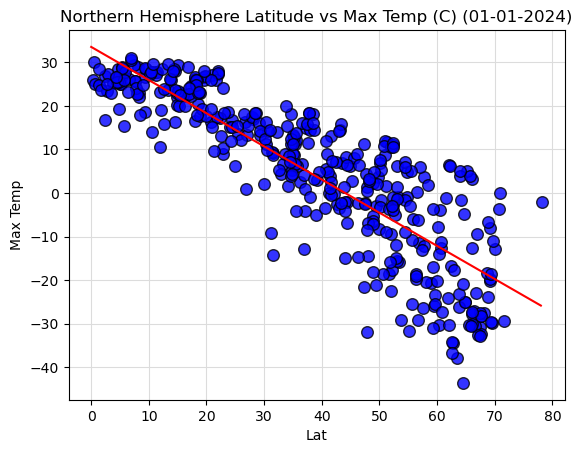

In [35]:
# Linear regression on Northern Hemisphere
northern_regress = latitude_regress(northern_hemi_df, "Lat", "Max Temp")
plt.title(f"Northern Hemisphere Latitude vs Max Temp (C) ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=0.25x+28.58
 
The r-squared correlation coefficient for this line is 0.61


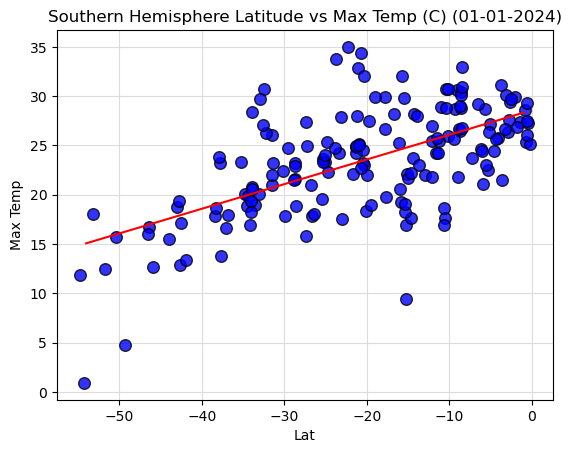

In [37]:
# Linear regression on Southern Hemisphere
southern_regress = latitude_regress(southern_hemi_df, "Lat", "Max Temp")
plt.title(f"Southern Hemisphere Latitude vs Max Temp (C) ({date})")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=0.36x+62.15
 
The r-squared correlation coefficient for this line is 0.39


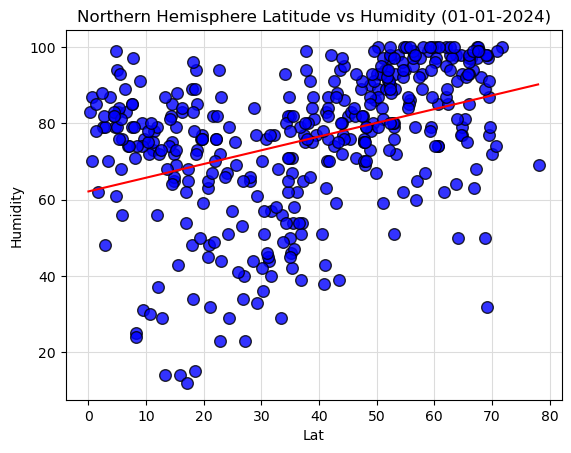

In [39]:
# Northern Hemisphere
northern_regress_humidity = latitude_regress(northern_hemi_df, "Lat", "Humidity")
plt.title(f"Northern Hemisphere Latitude vs Humidity ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=0.15x+81.59
 
The r-squared correlation coefficient for this line is 0.13


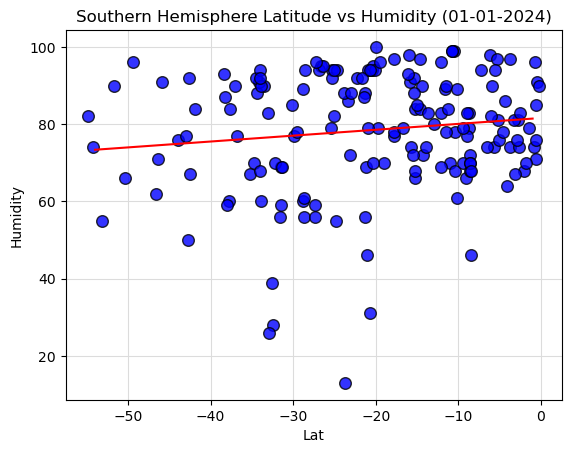

In [40]:
# Southern Hemisphere
southern_regress_humidity = latitude_regress(southern_hemi_df, "Lat", "Humidity")
plt.title(f"Southern Hemisphere Latitude vs Humidity ({date})")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=0.43x+44.55
 
The r-squared correlation coefficient for this line is 0.21


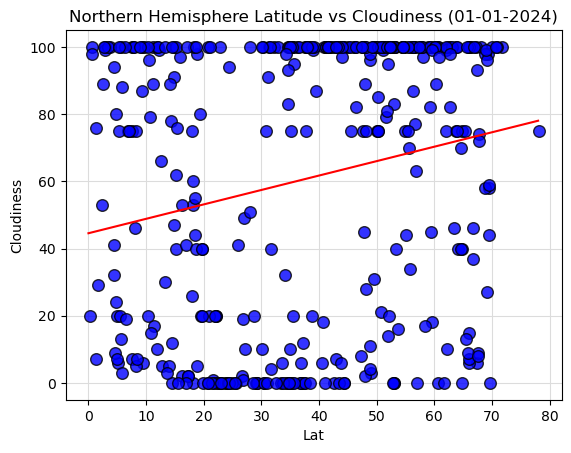

In [42]:
# Northern Hemisphere
northern_regress_clouds = latitude_regress(northern_hemi_df, "Lat", "Cloudiness")
plt.title(f"Northern Hemisphere Latitude vs Cloudiness ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=0.12x+66.81
 
The r-squared correlation coefficient for this line is 0.04


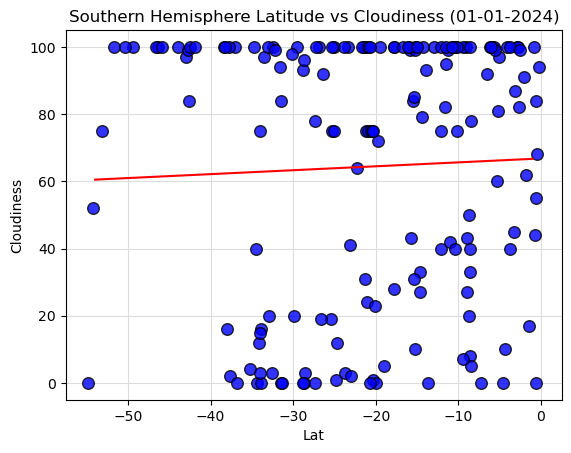

In [43]:
# Southern Hemisphere
southern_regress_clouds = latitude_regress(southern_hemi_df, "Lat", "Cloudiness")
plt.title(f"Southern Hemisphere Latitude vs Cloudiness ({date})")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=0.01x+3.07
 
The r-squared correlation coefficient for this line is 0.11


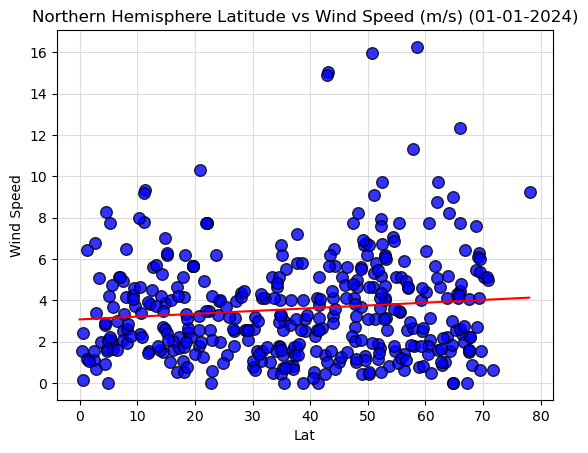

In [44]:
# Northern Hemisphere
northern_regress_wind = latitude_regress(northern_hemi_df, "Lat", "Wind Speed")
plt.title(f"Northern Hemisphere Latitude vs Wind Speed (m/s) ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=-0.07x+1.92
 
The r-squared correlation coefficient for this line is -0.38


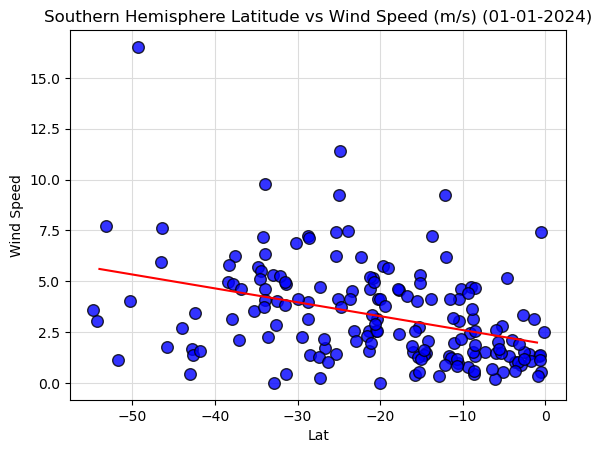

In [45]:
# Southern Hemisphere
southern_regress_wind = latitude_regress(southern_hemi_df, "Lat", "Wind Speed")
plt.title(f"Southern Hemisphere Latitude vs Wind Speed (m/s) ({date})")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE